In [654]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage.morphology import disk, opening, white_tophat
from skimage.filters import median
from skimage.measure import label, regionprops

# Configura o tamanho das imagens para ficarem grandes na tela
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)

In [655]:
# A função que precessa a imagem do dado e conta os pontos(pips) da face
def processar_dado(caminho_imagem, limiar, tamanho_min, tamanho_max, forma_max):     

    # 1. Carregar e Converter para escala de cinza
    img_original = plt.imread(caminho_imagem)
 
    # Verifica quantas dimensões a imagem tem (Altura, Largura, Canais)
    if img_original.ndim == 3:
        # Se tiver 4 canais, é um PNG com transparência (RGBA)
        if img_original.shape[2] == 4:
            img_rgb = color.rgba2rgb(img_original)
            img_gray = color.rgb2gray(img_rgb)
        else:
            # Se tiver 3 canais, é RGB normal (JPG)
            img_gray = color.rgb2gray(img_original)
    else:
        # Se já tiver 2 dimensões, já é cinza
        img_gray = img_original

    # O rgb2gray retorna valores entre 0.0 e 1.0 (float).
    # Precisamos multiplicar por 255 e tranformar em inteiro para compatibilizar.
    if img_gray.max() <= 1.0:
        img_gray = (img_gray * 255).astype(np.uint8)

    # 2. Executo o método Top-Hat - Corrige iluminação
    img_tophat = white_tophat(img_gray, disk(20))

    # 3. Aplica o filtro de Mediana - Suaviza a imagem
    img_suave = median(img_tophat, disk(2))

    # 4. Aplica a Binarização Ajustável - transforma em uma imagem binaria
    img_binaria = img_suave > limiar

    # 5. Limpeza com Abertura - tira ruidos pequenos da imagem
    img_limpa = opening(img_binaria, disk(2))

    # 6. Contagem com Filtros - faz  a contagem dos pontos
    img_rotulada = label(img_limpa)

    contagem = 0
    # Lista para guardar só os pontos certos
    objetos_aprovados = []          


    for regiao in regionprops(img_rotulada):
        # Filtro de Tamanho (Área)
        if regiao.area >= tamanho_min and regiao.area <= tamanho_max:
            # Filtro de Forma (Excentricidade)
            if regiao.eccentricity <= forma_max:
                contagem += 1
                objetos_aprovados.append(regiao)

    return img_original, img_gray, img_tophat, img_limpa, contagem, objetos_aprovados

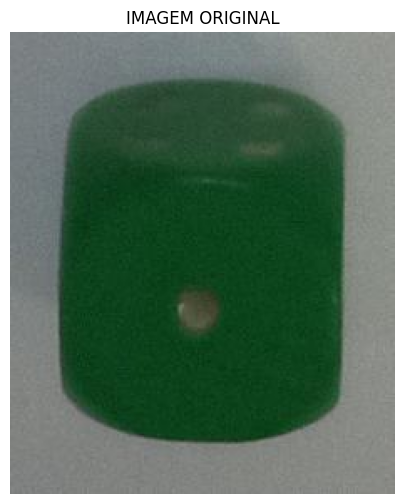

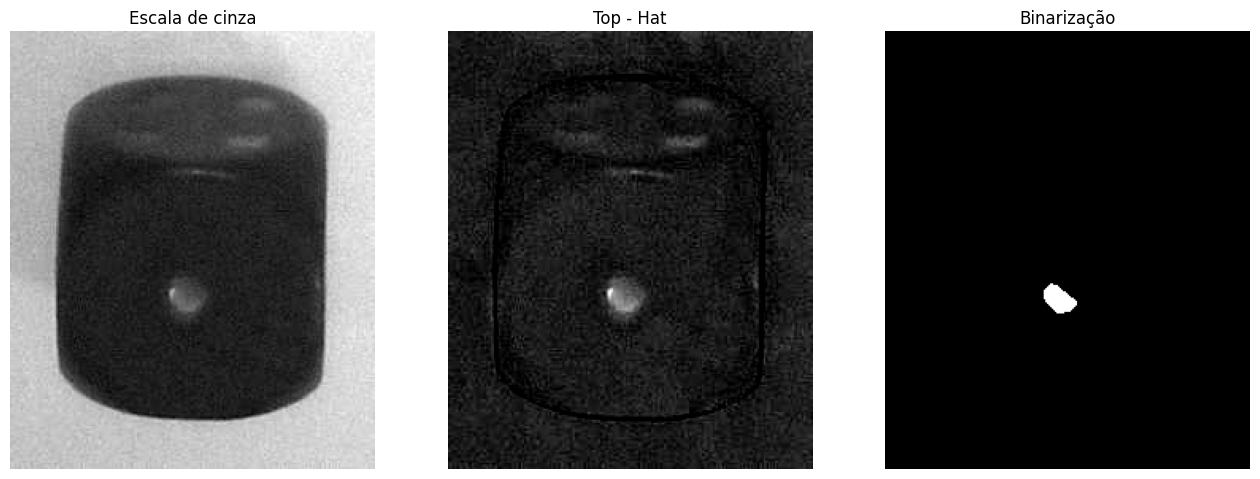

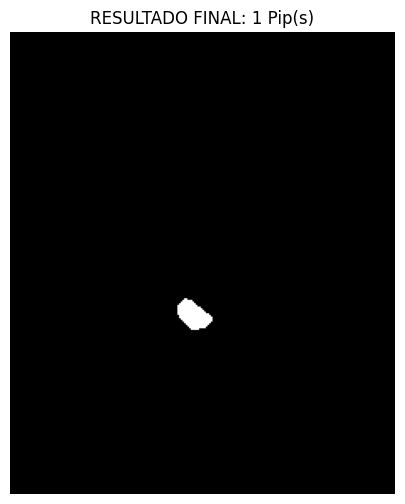

--------------------------------------------------
RESULTADO: 1 Pip(s) encontrados.
--------------------------------------------------


In [ ]:
# parte de teste e visualizaçãodas imagens

# 1. Caminho do iamgem que vai ser testada (Colocar o caminho da imagem aqui)
arquivo = r'...'

try:
    # 2. Chamada das funções com os parâmetraos, para a visulisação dos resultados
    original, gray, tophat, binaria, total, objetos = processar_dado(arquivo, limiar=25, tamanho_min=126, tamanho_max=770, forma_max=0.82)

    # Imagem 1: Original
    plt.figure(figsize=(6, 6))
    plt.imshow(original)
    plt.title("IMAGEM ORIGINAL")
    plt.axis('off')
    plt.show()

    # Imagens da escala de cinza, do top-hat e da binarização
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8))
    ax1.imshow(gray, cmap='gray')
    ax1.set_title("Escala de cinza")
    ax1.axis('off')

    ax2.imshow(tophat, cmap='gray')
    ax2.set_title(f"Top - Hat")
    ax2.axis('off')
    
    ax3.imshow(binaria, cmap='gray')
    ax3.set_title(f"Binarização")
    ax3.axis('off')
    plt.show()

    # Mostra o Resultado Final (Só o que tem tamanho e forma de ponto)
    # Criamos uma máscara preta e pintamos só os aprovados
    mascara_final = np.zeros_like(binaria)
    for obj in objetos:
        for coords in obj.coords:
            mascara_final[coords[0], coords[1]] = 1

    plt.figure(figsize=(6, 6))
    
    plt.imshow(mascara_final, cmap='gray') 
    plt.title(f"RESULTADO FINAL: {total} Pip(s)") 
    plt.axis('off')
    plt.show()

    print(f"--------------------------------------------------")
    print(f"RESULTADO: {total} Pip(s) encontrados.")
    print(f"--------------------------------------------------")

except Exception as e:
    print(f"Erro: {e}")